In [112]:
# Basic Libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from scipy import stats
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [113]:
twitchdata = pd.read_csv('test_data2.csv')
twitchdata.head()

,id,user_id,user_login,user_name,game_id,game_name,type,title,viewer_count,started_at,language,thumbnail_url,tag_ids,is_mature,follow_count,total_views
0,45141548204,27115917,kamet0,Kamet0,509658.0,Just Chatting,live,REDDIT WAR | ON FAIT LA GUERRE SUR LE R/PLACE ...,272883,2022-04-04T10:20:45Z,fr,https://static-cdn.jtvnw.net/previews-ttv/live...,['6f655045-9989-4ef7-8f85-1edcec42d648'],False,1230588,102061711
1,46069421021,83232866,ibai,ibai,509658.0,Just Chatting,live,GUERRA EN REDDIT | ÚLTIMO DÍA | HOY SE DECIDE ...,251355,2022-04-04T13:41:21Z,es,https://static-cdn.jtvnw.net/previews-ttv/live...,['d4bb9c58-2141-4881-bcdc-3fe0505457d1'],False,9770181,350406048
2,46069834125,459331509,auronplay,auronplay,509658.0,Just Chatting,live,GUERRA EN REDDIT? Y POR QUÉ NO NOS BESAMOS? NO...,165692,2022-04-04T14:47:47Z,es,https://static-cdn.jtvnw.net/previews-ttv/live...,['d4bb9c58-2141-4881-bcdc-3fe0505457d1'],False,12255320,256207080
3,45142671692,622498423,otplol_,otplol_,21779.0,League of Legends,live,EUM PLAY-IN - KCORP / VIT EN DUPLEX - JOUR 1 -...,89981,2022-04-04T14:30:12Z,fr,https://static-cdn.jtvnw.net/previews-ttv/live...,"['6f655045-9989-4ef7-8f85-1edcec42d648', '36a8...",False,505006,96518958
4,46069561085,39426641,evelone192,Evelone192,509658.0,Just Chatting,live,Pixel battle Freak,42746,2022-04-04T14:03:28Z,ru,https://static-cdn.jtvnw.net/previews-ttv/live...,['0569b171-2a2b-476e-a596-5bdfb45a1327'],False,2085936,98111163


In [114]:
print(twitchdata.dtypes) #Types of data 

id                 int64
user_id            int64
user_login        object
user_name         object
game_id          float64
game_name         object
type              object
title             object
viewer_count       int64
started_at        object
language          object
thumbnail_url     object
tag_ids           object
is_mature           bool
follow_count       int64
total_views        int64
dtype: object


In [115]:
# Number of Games Stream in the Dataset
print("Number of Games Streamed :", len(twitchdata["game_name"].unique()))

# Top 10 Games Streamed on Twitch and their count
print(twitchdata["game_name"].value_counts().nlargest(10))

Number of Games Streamed : 1402
Just Chatting            2411
Grand Theft Auto V       1084
VALORANT                  928
League of Legends         884
Fortnite                  870
Apex Legends              719
Elden Ring                631
Call of Duty: Warzone     553
Music                     513
Dead by Daylight          508
Name: game_name, dtype: int64


False    13995
True      8503
Name: is_mature, dtype: int64


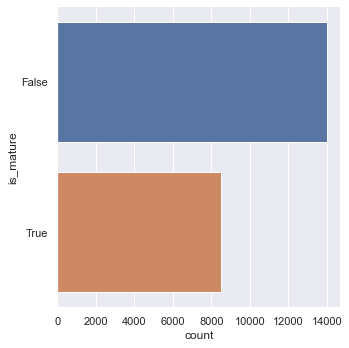

In [116]:
print(twitchdata["is_mature"].value_counts())
sb.catplot(y = "is_mature", data = twitchdata, kind = "count")

In [117]:
# Number of Different Languages in the Dataset
print("Number of languages:", len(twitchdata["language"].unique()))

# Top 10 Languages Streamed on Twitch and their count
print(twitchdata["language"].value_counts().nlargest(10))

Number of languages: 33
en    10882
es     2022
pt     1691
de     1414
ru     1204
ko     1099
fr     1093
zh      515
ja      457
it      416
Name: language, dtype: int64


In [118]:
gn_fc = twitchdata[['game_name', 'follow_count']]
gn_fc.head()

,game_name,follow_count
0,Just Chatting,1230588
1,Just Chatting,9770181
2,Just Chatting,12255320
3,League of Legends,505006
4,Just Chatting,2085936


In [119]:
JC_dataset = twitchdata.loc[twitchdata['game_name']=='Just Chatting'] # Getting dataset on a specific game
JC_dataset.head()

,id,user_id,user_login,user_name,game_id,game_name,type,title,viewer_count,started_at,language,thumbnail_url,tag_ids,is_mature,follow_count,total_views
0,45141548204,27115917,kamet0,Kamet0,509658.0,Just Chatting,live,REDDIT WAR | ON FAIT LA GUERRE SUR LE R/PLACE ...,272883,2022-04-04T10:20:45Z,fr,https://static-cdn.jtvnw.net/previews-ttv/live...,['6f655045-9989-4ef7-8f85-1edcec42d648'],False,1230588,102061711
1,46069421021,83232866,ibai,ibai,509658.0,Just Chatting,live,GUERRA EN REDDIT | ÚLTIMO DÍA | HOY SE DECIDE ...,251355,2022-04-04T13:41:21Z,es,https://static-cdn.jtvnw.net/previews-ttv/live...,['d4bb9c58-2141-4881-bcdc-3fe0505457d1'],False,9770181,350406048
2,46069834125,459331509,auronplay,auronplay,509658.0,Just Chatting,live,GUERRA EN REDDIT? Y POR QUÉ NO NOS BESAMOS? NO...,165692,2022-04-04T14:47:47Z,es,https://static-cdn.jtvnw.net/previews-ttv/live...,['d4bb9c58-2141-4881-bcdc-3fe0505457d1'],False,12255320,256207080
4,46069561085,39426641,evelone192,Evelone192,509658.0,Just Chatting,live,Pixel battle Freak,42746,2022-04-04T14:03:28Z,ru,https://static-cdn.jtvnw.net/previews-ttv/live...,['0569b171-2a2b-476e-a596-5bdfb45a1327'],False,2085936,98111163
5,46069429789,137347549,locklear,Locklear,509658.0,Just Chatting,live,(MEME R/PLACE) LA GUERRE DES PIXELS - LE LIEN ...,37974,2022-04-04T13:42:46Z,fr,https://static-cdn.jtvnw.net/previews-ttv/live...,['6f655045-9989-4ef7-8f85-1edcec42d648'],False,1734538,63427975


In [120]:
JC_dataset.count()

id               2411
user_id          2411
user_login       2411
user_name        2411
game_id          2411
game_name        2411
type             2411
title            2411
viewer_count     2411
started_at       2411
language         2411
thumbnail_url    2411
tag_ids          2409
is_mature        2411
follow_count     2411
total_views      2411
dtype: int64

In [121]:
JC_dataset['viewer_count'].describe()

count      2411.000000
mean       1032.580672
std        9233.591956
min           8.000000
25%          29.000000
50%          58.000000
75%         153.000000
max      272883.000000
Name: viewer_count, dtype: float64

In [122]:
JC_dataset_vc = JC_dataset['viewer_count']

In [123]:
print(JC_dataset['viewer_count'].mean)

<bound method NDFrame._add_numeric_operations.<locals>.mean of 0        272883
1        251355
2        165692
4         42746
5         37974
          ...  
22458        18
22461        18
22475        22
22492        18
22495        18
Name: viewer_count, Length: 2411, dtype: int64>


In [124]:
GTA_dataset = twitchdata.loc[twitchdata['game_name']=='Grand Theft Auto V']
GTA_dataset['viewer_count'].describe()

count      1084.000000
mean        655.526753
std        4938.395187
min           8.000000
25%          30.000000
50%          64.500000
75%         162.250000
max      141823.000000
Name: viewer_count, dtype: float64

In [125]:
# Code to obtain brief statistics on games streamed on Twitch

gameName = twitchdata['game_name']

for x in gameName.unique():
    game = twitchdata.loc[twitchdata['game_name']==x]
    print(x)
    print(game['viewer_count'].describe())

Just Chatting
count      2411.000000
mean       1032.580672
std        9233.591956
min           8.000000
25%          29.000000
50%          58.000000
75%         153.000000
max      272883.000000
Name: viewer_count, dtype: float64
League of Legends
count      884.000000
mean       907.934389
std       5437.032083
min          8.000000
25%         25.000000
50%         47.500000
75%        144.250000
max      89981.000000
Name: viewer_count, dtype: float64
Dota 2
count      241.000000
mean       967.136929
std       4567.846103
min          9.000000
25%         27.000000
50%         57.000000
75%        200.000000
max      54050.000000
Name: viewer_count, dtype: float64
Tom Clancy's Rainbow Six Siege
count      128.000000
mean       842.929688
std       3632.646221
min          8.000000
25%         28.000000
50%         50.000000
75%        121.500000
max      26200.000000
Name: viewer_count, dtype: float64
Grand Theft Auto V
count      1084.000000
mean        655.526753
std        49

count      42.000000
mean      108.285714
std       243.128721
min         9.000000
25%        19.250000
50%        32.000000
75%        67.000000
max      1179.000000
Name: viewer_count, dtype: float64
Heroes of Might and Magic III: The Restoration of Erathia
count      23.000000
mean      141.304348
std       222.951775
min        12.000000
25%        35.000000
50%        62.000000
75%       181.000000
max      1086.000000
Name: viewer_count, dtype: float64
The Cycle: Frontier
count      31.000000
mean      115.580645
std       204.264661
min         9.000000
25%        22.000000
50%        54.000000
75%       115.500000
max      1085.000000
Name: viewer_count, dtype: float64
Age of Empires II
count     29.000000
mean     136.034483
std      180.604240
min       18.000000
25%       41.000000
50%       82.000000
75%      111.000000
max      897.000000
Name: viewer_count, dtype: float64
Super Mario Maker 2
count     13.000000
mean     114.000000
std      235.360008
min       14.000000


count      1.0
mean     371.0
std        NaN
min      371.0
25%      371.0
50%      371.0
75%      371.0
max      371.0
Name: viewer_count, dtype: float64
iRacing
count     36.000000
mean      84.111111
std       99.314156
min        8.000000
25%       25.750000
50%       37.000000
75%       92.750000
max      384.000000
Name: viewer_count, dtype: float64
Warcraft III
count      25.000000
mean      154.800000
std       358.980269
min         9.000000
25%        28.000000
50%        31.000000
75%       104.000000
max      1800.000000
Name: viewer_count, dtype: float64
Grand Theft Auto: San Andreas – The Definitive Edition
count      5.000000
mean     112.200000
std      147.784302
min       12.000000
25%       20.000000
50%       60.000000
75%      100.000000
max      369.000000
Name: viewer_count, dtype: float64
League of Legends: Wild Rift
count      39.000000
mean      337.102564
std       790.409847
min        19.000000
25%        37.500000
50%       129.000000
75%       219.000000


count     17.000000
mean     102.235294
std      141.745604
min       10.000000
25%       21.000000
50%       28.000000
75%      100.000000
max      445.000000
Name: viewer_count, dtype: float64
The Sandbox
count      3.000000
mean     120.000000
std       82.528783
min       25.000000
25%       93.000000
50%      161.000000
75%      167.500000
max      174.000000
Name: viewer_count, dtype: float64
Gran Turismo 7
count      19.000000
mean      152.157895
std       354.800924
min         9.000000
25%        24.500000
50%        44.000000
75%       113.000000
max      1595.000000
Name: viewer_count, dtype: float64
Diablo II: Resurrected
count     21.000000
mean     124.571429
std      213.780395
min       11.000000
25%       28.000000
50%       44.000000
75%      125.000000
max      956.000000
Name: viewer_count, dtype: float64
The Legend of Zelda: Ocarina of Time
count     24.000000
mean      96.833333
std      142.060204
min        9.000000
25%       27.000000
50%       45.000000
75%  

count     23.000000
mean     103.130435
std      110.356161
min       10.000000
25%       43.500000
50%       63.000000
75%      113.500000
max      528.000000
Name: viewer_count, dtype: float64
Pokémon Unite
count     68.000000
mean      79.897059
std      133.495613
min        8.000000
25%       22.750000
50%       33.000000
75%       61.000000
max      837.000000
Name: viewer_count, dtype: float64
Martha Is Dead
count       7.000000
mean      297.142857
std       594.085131
min        23.000000
25%        27.000000
50%        33.000000
75%       168.500000
max      1633.000000
Name: viewer_count, dtype: float64
Cuphead
count     14.000000
mean      75.071429
std       73.504018
min       11.000000
25%       28.750000
50%       57.000000
75%       81.500000
max      284.000000
Name: viewer_count, dtype: float64
Gwent: The Witcher Card Game
count     18.000000
mean     128.500000
std      144.085453
min       10.000000
25%       30.000000
50%       84.500000
75%      137.500000
max   

count     10.000000
mean      94.200000
std      131.547879
min        9.000000
25%       18.750000
50%       27.000000
75%       78.000000
max      344.000000
Name: viewer_count, dtype: float64
ArcheAge
count     6.000000
mean     40.833333
std      14.162156
min      24.000000
25%      30.000000
50%      41.000000
75%      49.750000
max      60.000000
Name: viewer_count, dtype: float64
PUBG Mobile
count     28.000000
mean      65.857143
std      101.025745
min       10.000000
25%       25.500000
50%       36.500000
75%       50.000000
max      467.000000
Name: viewer_count, dtype: float64
Fallout 4
count     12.000000
mean      49.000000
std       57.144156
min        9.000000
25%       23.500000
50%       36.000000
75%       42.750000
max      225.000000
Name: viewer_count, dtype: float64
Forza Horizon 5
count     22.000000
mean      71.363636
std       99.525324
min       11.000000
25%       21.250000
50%       29.000000
75%       56.500000
max      404.000000
Name: viewer_count, d

The Witcher 3: Wild Hunt
count     18.000000
mean     108.111111
std      174.714183
min        9.000000
25%       15.000000
50%       23.000000
75%       85.500000
max      644.000000
Name: viewer_count, dtype: float64
Donkey Kong Country 2: Diddy's Kong Quest
count     1.0
mean     39.0
std       NaN
min      39.0
25%      39.0
50%      39.0
75%      39.0
max      39.0
Name: viewer_count, dtype: float64
Golf With Your Friends
count     4.000000
mean     35.000000
std      31.527766
min       9.000000
25%      12.750000
50%      26.500000
75%      48.750000
max      78.000000
Name: viewer_count, dtype: float64
XCOM 2
count     5.000000
mean     37.200000
std      12.173742
min      25.000000
25%      31.000000
50%      34.000000
75%      39.000000
max      57.000000
Name: viewer_count, dtype: float64
The Last of Us Part II
count      9.000000
mean      92.111111
std      156.201348
min       18.000000
25%       28.000000
50%       38.000000
75%       53.000000
max      504.000000
Name

NieR: Automata
count     3.000000
mean     28.666667
std      11.590226
min      18.000000
25%      22.500000
50%      27.000000
75%      34.000000
max      41.000000
Name: viewer_count, dtype: float64
State of Decay 2
count     2.000000
mean     17.500000
std      12.020815
min       9.000000
25%      13.250000
50%      17.500000
75%      21.750000
max      26.000000
Name: viewer_count, dtype: float64
Sifu
count       3.000000
mean      576.666667
std       953.782645
min        26.000000
25%        26.000000
50%        26.000000
75%       852.000000
max      1678.000000
Name: viewer_count, dtype: float64
Slam Dunk
count     4.000000
mean     19.500000
std       9.398581
min      10.000000
25%      12.250000
50%      19.500000
75%      26.750000
max      29.000000
Name: viewer_count, dtype: float64
Rogue Company
count    18.000000
mean     25.666667
std      11.151365
min       9.000000
25%      19.250000
50%      22.500000
75%      28.000000
max      48.000000
Name: viewer_count, dty

Garry's Mod
count      5.000000
mean     216.000000
std      357.888949
min       46.000000
25%       53.000000
50%       54.000000
75%       71.000000
max      856.000000
Name: viewer_count, dtype: float64
Sonic Mania
count      1.0
mean     798.0
std        NaN
min      798.0
25%      798.0
50%      798.0
75%      798.0
max      798.0
Name: viewer_count, dtype: float64
Wormate.io
count      2.00000
mean     273.00000
std      329.51176
min       40.00000
25%      156.50000
50%      273.00000
75%      389.50000
max      506.00000
Name: viewer_count, dtype: float64
Tabletop Simulator
count       6.000000
mean      302.000000
std       445.831807
min        28.000000
25%        33.000000
50%        78.000000
75%       363.750000
max      1151.000000
Name: viewer_count, dtype: float64
Special Events
count      10.00000
mean      497.50000
std       671.78936
min        21.00000
25%        32.00000
50%       117.50000
75%       729.75000
max      1693.00000
Name: viewer_count, dtype: floa

Frostpunk
count     2.000000
mean     48.000000
std      12.727922
min      39.000000
25%      43.500000
50%      48.000000
75%      52.500000
max      57.000000
Name: viewer_count, dtype: float64
Dragon Quest III: The Seeds of Salvation
count     1.0
mean     57.0
std       NaN
min      57.0
25%      57.0
50%      57.0
75%      57.0
max      57.0
Name: viewer_count, dtype: float64
Passpartout: The Starving Artist
count     1.0
mean     57.0
std       NaN
min      57.0
25%      57.0
50%      57.0
75%      57.0
max      57.0
Name: viewer_count, dtype: float64
Friday the 13th: The Game
count     3.000000
mean     49.000000
std      36.660606
min       9.000000
25%      33.000000
50%      57.000000
75%      69.000000
max      81.000000
Name: viewer_count, dtype: float64
Pokémon Trading Card Game Online
count     7.000000
mean     45.000000
std      26.425997
min      21.000000
25%      27.000000
50%      33.000000
75%      55.500000
max      96.000000
Name: viewer_count, dtype: float64
Ho

Skate 3
count     2.000000
mean     25.000000
std       8.485281
min      19.000000
25%      22.000000
50%      25.000000
75%      28.000000
max      31.000000
Name: viewer_count, dtype: float64
Nancy Drew: Stay Tuned for Danger
count     1.0
mean     31.0
std       NaN
min      31.0
25%      31.0
50%      31.0
75%      31.0
max      31.0
Name: viewer_count, dtype: float64
Kameo: Elements of Power
count     1.0
mean     30.0
std       NaN
min      30.0
25%      30.0
50%      30.0
75%      30.0
max      30.0
Name: viewer_count, dtype: float64
Dandy Ace
count     1.0
mean     30.0
std       NaN
min      30.0
25%      30.0
50%      30.0
75%      30.0
max      30.0
Name: viewer_count, dtype: float64
Jump King
count      7.000000
mean      86.428571
std      167.679115
min        9.000000
25%       17.500000
50%       30.000000
75%       32.500000
max      466.000000
Name: viewer_count, dtype: float64
Zniw Adventure
count     1.0
mean     29.0
std       NaN
min      29.0
25%      29.0
50%  

count     1.0
mean     21.0
std       NaN
min      21.0
25%      21.0
50%      21.0
75%      21.0
max      21.0
Name: viewer_count, dtype: float64
Star Trek Online
count     2.000000
mean     14.500000
std       7.778175
min       9.000000
25%      11.750000
50%      14.500000
75%      17.250000
max      20.000000
Name: viewer_count, dtype: float64
Sleep
count     1.0
mean     20.0
std       NaN
min      20.0
25%      20.0
50%      20.0
75%      20.0
max      20.0
Name: viewer_count, dtype: float64
Deliver Us The Moon
count     1.0
mean     20.0
std       NaN
min      20.0
25%      20.0
50%      20.0
75%      20.0
max      20.0
Name: viewer_count, dtype: float64
Vampyr
count     2.000000
mean     19.000000
std       1.414214
min      18.000000
25%      18.500000
50%      19.000000
75%      19.500000
max      20.000000
Name: viewer_count, dtype: float64
Final Fantasy XI Online
count      4.000000
mean      55.500000
std       65.250798
min       18.000000
25%       19.500000
50%       2

count     2.000000
mean     35.000000
std      21.213203
min      20.000000
25%      27.500000
50%      35.000000
75%      42.500000
max      50.000000
Name: viewer_count, dtype: float64
Final Fantasy III
count     1.0
mean     49.0
std       NaN
min      49.0
25%      49.0
50%      49.0
75%      49.0
max      49.0
Name: viewer_count, dtype: float64
Jak and Daxter: The Precursor Legacy
count     1.0
mean     46.0
std       NaN
min      46.0
25%      46.0
50%      46.0
75%      46.0
max      46.0
Name: viewer_count, dtype: float64
Dead Space
count     4.000000
mean     34.500000
std       8.888194
min      27.000000
25%      27.750000
50%      32.500000
75%      39.250000
max      46.000000
Name: viewer_count, dtype: float64
Hero's Hour
count     1.0
mean     44.0
std       NaN
min      44.0
25%      44.0
50%      44.0
75%      44.0
max      44.0
Name: viewer_count, dtype: float64
Spyro the Dragon: Reignited Trilogy
count     4.000000
mean     28.750000
std      10.210289
min      20.00

count      6.000000
mean     111.333333
std      126.264273
min       17.000000
25%       32.750000
50%       35.500000
75%      209.250000
max      281.000000
Name: viewer_count, dtype: float64
Sudden Attack
count     1.0
mean     17.0
std       NaN
min      17.0
25%      17.0
50%      17.0
75%      17.0
max      17.0
Name: viewer_count, dtype: float64
Core Keeper
count     11.00000
mean     119.00000
std      263.67973
min       12.00000
25%       19.50000
50%       35.00000
75%       51.50000
max      908.00000
Name: viewer_count, dtype: float64
Wonder Boy: The Dragon's Trap
count     1.0
mean     15.0
std       NaN
min      15.0
25%      15.0
50%      15.0
75%      15.0
max      15.0
Name: viewer_count, dtype: float64
Spirit Detective
count     1.0
mean     15.0
std       NaN
min      15.0
25%      15.0
50%      15.0
75%      15.0
max      15.0
Name: viewer_count, dtype: float64
The Legend of Zelda: The Wind Waker HD
count     3.000000
mean     35.333333
std      27.024680
min     

count     7.000000
mean     21.571429
std       6.972736
min       9.000000
25%      19.500000
50%      21.000000
75%      25.500000
max      31.000000
Name: viewer_count, dtype: float64
Tony Hawk's Pro Skater 4
count    1.0
mean     9.0
std      NaN
min      9.0
25%      9.0
50%      9.0
75%      9.0
max      9.0
Name: viewer_count, dtype: float64
Cookie Run: OvenSmash
count    1.0
mean     9.0
std      NaN
min      9.0
25%      9.0
50%      9.0
75%      9.0
max      9.0
Name: viewer_count, dtype: float64
Final Fantasy
count    1.0
mean     9.0
std      NaN
min      9.0
25%      9.0
50%      9.0
75%      9.0
max      9.0
Name: viewer_count, dtype: float64
Nioh 2: The Complete Edition
count     2.000000
mean     39.000000
std      42.426407
min       9.000000
25%      24.000000
50%      39.000000
75%      54.000000
max      69.000000
Name: viewer_count, dtype: float64
OneShot
count    1.0
mean     9.0
std      NaN
min      9.0
25%      9.0
50%      9.0
75%      9.0
max      9.0
Name: v

count     1.0
mean     55.0
std       NaN
min      55.0
25%      55.0
50%      55.0
75%      55.0
max      55.0
Name: viewer_count, dtype: float64
Final Fantasy XV
count     2.000000
mean     42.000000
std      16.970563
min      30.000000
25%      36.000000
50%      42.000000
75%      48.000000
max      54.000000
Name: viewer_count, dtype: float64
Borderlands 3
count     2.000000
mean     47.500000
std       9.192388
min      41.000000
25%      44.250000
50%      47.500000
75%      50.750000
max      54.000000
Name: viewer_count, dtype: float64
The Elder Scrolls: Legends
count     1.0
mean     52.0
std       NaN
min      52.0
25%      52.0
50%      52.0
75%      52.0
max      52.0
Name: viewer_count, dtype: float64
Life is Strange
count     4.000000
mean     40.750000
std      16.560495
min      20.000000
25%      31.250000
50%      43.500000
75%      53.000000
max      56.000000
Name: viewer_count, dtype: float64
Super Ghouls 'n Ghosts
count     1.0
mean     50.0
std       NaN
min   

count     2.000000
mean     27.500000
std       6.363961
min      23.000000
25%      25.250000
50%      27.500000
75%      29.750000
max      32.000000
Name: viewer_count, dtype: float64
The Room Three
count     1.0
mean     23.0
std       NaN
min      23.0
25%      23.0
50%      23.0
75%      23.0
max      23.0
Name: viewer_count, dtype: float64
HITMAN 3
count      4.000000
mean      89.500000
std      136.343928
min       19.000000
25%       21.250000
50%       22.500000
75%       90.750000
max      294.000000
Name: viewer_count, dtype: float64
Final Fantasy X-2 HD Remaster
count     1.0
mean     22.0
std       NaN
min      22.0
25%      22.0
50%      22.0
75%      22.0
max      22.0
Name: viewer_count, dtype: float64
Marvel's Guardians of the Galaxy
count     1.0
mean     24.0
std       NaN
min      24.0
25%      24.0
50%      24.0
75%      24.0
max      24.0
Name: viewer_count, dtype: float64
Super Mario 3D World
count     1.0
mean     22.0
std       NaN
min      22.0
25%      22.0

count     1.0
mean     32.0
std       NaN
min      32.0
25%      32.0
50%      32.0
75%      32.0
max      32.0
Name: viewer_count, dtype: float64
Little Nightmares
count     2.000000
mean     26.000000
std       7.071068
min      21.000000
25%      23.500000
50%      26.000000
75%      28.500000
max      31.000000
Name: viewer_count, dtype: float64
The Walking Dead: The Final Season
count     2.000000
mean     27.000000
std       4.242641
min      24.000000
25%      25.500000
50%      27.000000
75%      28.500000
max      30.000000
Name: viewer_count, dtype: float64
Jak II
count     1.0
mean     30.0
std       NaN
min      30.0
25%      30.0
50%      30.0
75%      30.0
max      30.0
Name: viewer_count, dtype: float64
Two Point Hospital
count     2.000000
mean     39.500000
std      14.849242
min      29.000000
25%      34.250000
50%      39.500000
75%      44.750000
max      50.000000
Name: viewer_count, dtype: float64
beatmania IIDX INFINITAS
count     1.0
mean     29.0
std       NaN

count     3.000000
mean     66.333333
std      41.016257
min      20.000000
25%      50.500000
50%      81.000000
75%      89.500000
max      98.000000
Name: viewer_count, dtype: float64
Escape from Monkey Island
count     1.0
mean     73.0
std       NaN
min      73.0
25%      73.0
50%      73.0
75%      73.0
max      73.0
Name: viewer_count, dtype: float64
Stream Pairs
count     2.000000
mean     51.500000
std      30.405592
min      30.000000
25%      40.750000
50%      51.500000
75%      62.250000
max      73.000000
Name: viewer_count, dtype: float64
Cube Escape: Case 23
count     1.0
mean     68.0
std       NaN
min      68.0
25%      68.0
50%      68.0
75%      68.0
max      68.0
Name: viewer_count, dtype: float64
LEGO Star Wars: The Video Game
count     1.0
mean     68.0
std       NaN
min      68.0
25%      68.0
50%      68.0
75%      68.0
max      68.0
Name: viewer_count, dtype: float64
Koudelka
count     1.0
mean     62.0
std       NaN
min      62.0
25%      62.0
50%      62.0
7

count     1.0
mean     11.0
std       NaN
min      11.0
25%      11.0
50%      11.0
75%      11.0
max      11.0
Name: viewer_count, dtype: float64
Tales of Zestiria
count     1.0
mean     11.0
std       NaN
min      11.0
25%      11.0
50%      11.0
75%      11.0
max      11.0
Name: viewer_count, dtype: float64
The Expendabros
count     1.0
mean     11.0
std       NaN
min      11.0
25%      11.0
50%      11.0
75%      11.0
max      11.0
Name: viewer_count, dtype: float64
Tom Clancy's Ghost Recon: Wildlands
count     2.000000
mean     19.500000
std      12.020815
min      11.000000
25%      15.250000
50%      19.500000
75%      23.750000
max      28.000000
Name: viewer_count, dtype: float64
Tower Unite
count     1.0
mean     11.0
std       NaN
min      11.0
25%      11.0
50%      11.0
75%      11.0
max      11.0
Name: viewer_count, dtype: float64
Last Oasis
count     1.0
mean     11.0
std       NaN
min      11.0
25%      11.0
50%      11.0
75%      11.0
max      11.0
Name: viewer_count, 

Name: viewer_count, dtype: float64
Priston Tale 2
count     1.0
mean     45.0
std       NaN
min      45.0
25%      45.0
50%      45.0
75%      45.0
max      45.0
Name: viewer_count, dtype: float64
Donkey Kong 64
count     1.0
mean     43.0
std       NaN
min      43.0
25%      43.0
50%      43.0
75%      43.0
max      43.0
Name: viewer_count, dtype: float64
Bully
count     1.0
mean     41.0
std       NaN
min      41.0
25%      41.0
50%      41.0
75%      41.0
max      41.0
Name: viewer_count, dtype: float64
Call of Duty
count     2.000000
mean     28.500000
std      14.849242
min      18.000000
25%      23.250000
50%      28.500000
75%      33.750000
max      39.000000
Name: viewer_count, dtype: float64
Madden NFL Mobile
count     2.000000
mean     39.500000
std       0.707107
min      39.000000
25%      39.250000
50%      39.500000
75%      39.750000
max      40.000000
Name: viewer_count, dtype: float64
At Dead Of Night
count     1.0
mean     39.0
std       NaN
min      39.0
25%      3

Aeterna Noctis
count     2.000000
mean     20.000000
std       1.414214
min      19.000000
25%      19.500000
50%      20.000000
75%      20.500000
max      21.000000
Name: viewer_count, dtype: float64
Lunch Lady
count     2.000000
mean     23.000000
std       5.656854
min      19.000000
25%      21.000000
50%      23.000000
75%      25.000000
max      27.000000
Name: viewer_count, dtype: float64
Pavlov VR
count     1.0
mean     19.0
std       NaN
min      19.0
25%      19.0
50%      19.0
75%      19.0
max      19.0
Name: viewer_count, dtype: float64
Final Fantasy VII: The First Soldier
count     1.0
mean     19.0
std       NaN
min      19.0
25%      19.0
50%      19.0
75%      19.0
max      19.0
Name: viewer_count, dtype: float64
Into the Breach
count     1.0
mean     19.0
std       NaN
min      19.0
25%      19.0
50%      19.0
75%      19.0
max      19.0
Name: viewer_count, dtype: float64
The Sims 2
count     1.0
mean     18.0
std       NaN
min      18.0
25%      18.0
50%      18.0
7

count     1.0
mean     40.0
std       NaN
min      40.0
25%      40.0
50%      40.0
75%      40.0
max      40.0
Name: viewer_count, dtype: float64
Mega Man 3
count     1.0
mean     39.0
std       NaN
min      39.0
25%      39.0
50%      39.0
75%      39.0
max      39.0
Name: viewer_count, dtype: float64
Train Station Renovation
count     1.0
mean     39.0
std       NaN
min      39.0
25%      39.0
50%      39.0
75%      39.0
max      39.0
Name: viewer_count, dtype: float64
Dicey Dungeons
count     1.0
mean     37.0
std       NaN
min      37.0
25%      37.0
50%      37.0
75%      37.0
max      37.0
Name: viewer_count, dtype: float64
Zenith: The Last City
count     1.0
mean     37.0
std       NaN
min      37.0
25%      37.0
50%      37.0
75%      37.0
max      37.0
Name: viewer_count, dtype: float64
Yu-Gi-Oh! 5D's Tag Force 6
count     1.0
mean     37.0
std       NaN
min      37.0
25%      37.0
50%      37.0
75%      37.0
max      37.0
Name: viewer_count, dtype: float64
The King of Fighte

count      1.0
mean     110.0
std        NaN
min      110.0
25%      110.0
50%      110.0
75%      110.0
max      110.0
Name: viewer_count, dtype: float64
Red Dead Redemption
count     1.0
mean     96.0
std       NaN
min      96.0
25%      96.0
50%      96.0
75%      96.0
max      96.0
Name: viewer_count, dtype: float64
The Ghost Train
count     1.0
mean     96.0
std       NaN
min      96.0
25%      96.0
50%      96.0
75%      96.0
max      96.0
Name: viewer_count, dtype: float64
The Order: 1886
count     1.0
mean     75.0
std       NaN
min      75.0
25%      75.0
50%      75.0
75%      75.0
max      75.0
Name: viewer_count, dtype: float64
Stigmatized Property | 事故物件
count     1.0
mean     75.0
std       NaN
min      75.0
25%      75.0
50%      75.0
75%      75.0
max      75.0
Name: viewer_count, dtype: float64
Metal Gear Solid 2: Sons of Liberty
count     1.0
mean     65.0
std       NaN
min      65.0
25%      65.0
50%      65.0
75%      65.0
max      65.0
Name: viewer_count, dtype: fl

Resident Evil: Code Veronica X HD
count     1.0
mean     18.0
std       NaN
min      18.0
25%      18.0
50%      18.0
75%      18.0
max      18.0
Name: viewer_count, dtype: float64


<AxesSubplot:>

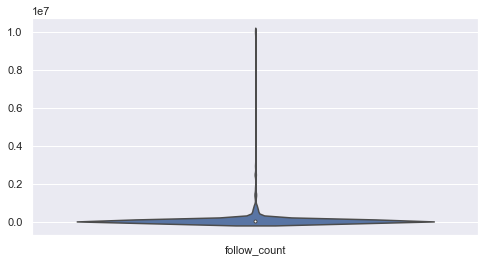

In [126]:
# Setting up dataframes and numeric correlation of int64 datatypes # Valorant dataset

valorant = twitchdata.loc[twitchdata['game_name']=='VALORANT']

valorant_num = pd.DataFrame(valorant[["follow_count"]])

f = plt.figure(figsize=(8, 4))

sb.violinplot(data = valorant_num)

<AxesSubplot:>

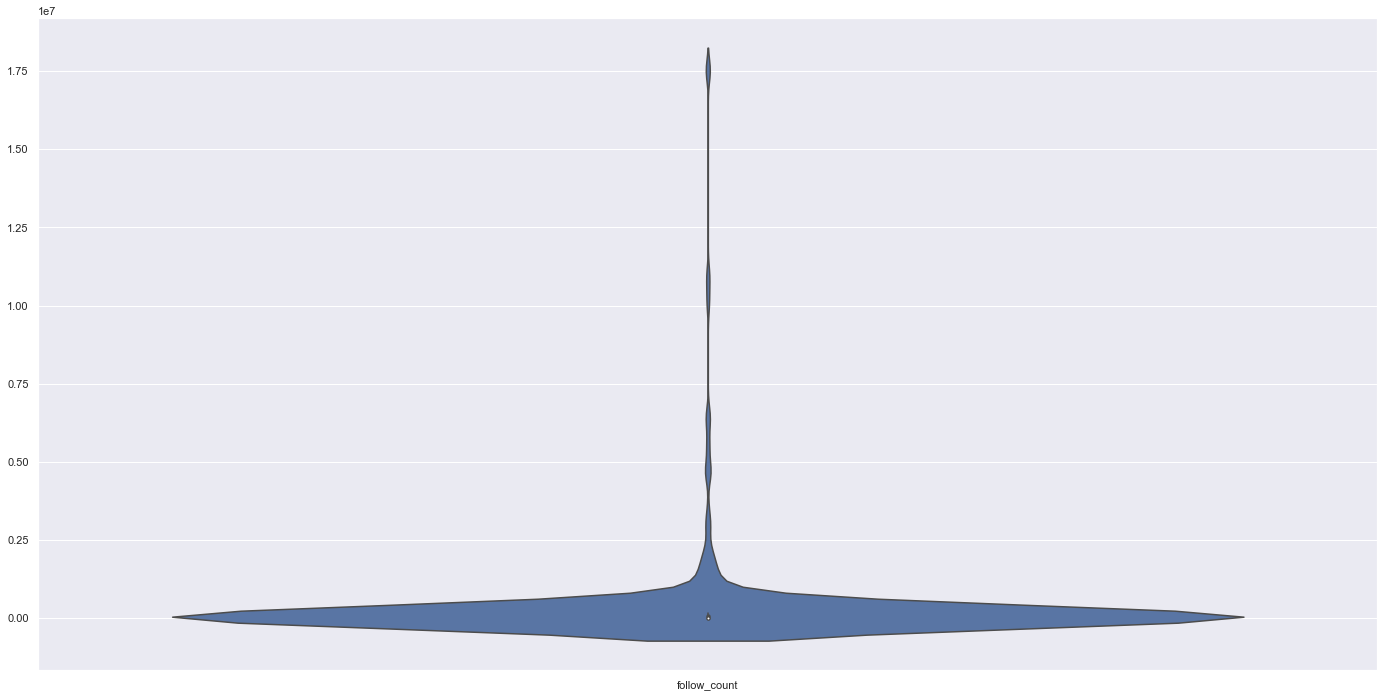

In [127]:
# Setting up dataframes and numeric correlation of int64 datatypes # Fortnite dataset

fortnite = twitchdata.loc[twitchdata['game_name']=='Fortnite']

fortnite_num = pd.DataFrame(fortnite[["follow_count"]])

f = plt.subplots(figsize=(24, 12))

# Plot the basic uni-variate figures for Fortnite
sb.violinplot(data = fortnite_num)

In [144]:
english = twitchdata.loc[twitchdata['language']=='en'] 
 
en = english[['viewer_count', 'language']]
en = en.reset_index(drop = True)
 
en.describe

<bound method NDFrame.describe of        viewer_count language
0             31411       en
1             27026       en
2             26200       en
3             19614       en
4             16835       en
...             ...      ...
10877            18       en
10878            18       en
10879            18       en
10880            18       en
10881            17       en

[10882 rows x 2 columns]>

In [139]:
en.head()

8     31411
11    27026
12    26200
17    19614
21    16835
Name: viewer_count, dtype: int64

In [146]:
spanish = twitchdata.loc[twitchdata['language']=='es'] 
 
es =spanish[['viewer_count', 'language']]
es = es.reset_index(drop = True)
 
es.describe

<bound method NDFrame.describe of       viewer_count language
0           251355       es
1           165692       es
2            25959       es
3            22084       es
4             4396       es
...            ...      ...
2017            21       es
2018            21       es
2019            26       es
2020            18       es
2021            18       es

[2022 rows x 2 columns]>

In [147]:
es.head()

,viewer_count,language
0,251355,es
1,165692,es
2,25959,es
3,22084,es
4,4396,es


In [148]:
twitchdata.count()

id               22498
user_id          22498
user_login       22498
user_name        22498
game_id          22170
game_name        22195
type             22498
title            22375
viewer_count     22498
started_at       22498
language         22498
thumbnail_url    22498
tag_ids          22491
is_mature        22498
follow_count     22498
total_views      22498
dtype: int64

In [149]:
viewcount = twitchdata[["viewer_count"]]
viewcount.describe()

,viewer_count
count,22498.000000
mean,399.233621
std,3887.617151
min,8.000000
25%,24.000000
50%,42.000000
75%,104.000000
max,272883.000000


In [150]:
cleantwitch = viewcount[(np.abs(stats.zscore(viewcount)) < 1.5).all(axis=1)]
cleantwitch.count()

viewer_count    22290
dtype: int64

In [151]:
cleantwitch.shape

(22290, 1)

In [152]:
cleantwitch.describe()

,viewer_count
count,22290.000000
mean,155.228982
std,425.727142
min,8.000000
25%,24.000000
50%,42.000000
75%,101.000000
max,6144.000000


In [153]:

enes = pd.concat([en, es])

enes.head()

#f = plt.figure(figsize=(18, 6))
#sb.swarmplot(x = "Total", y = "Legendary", data = trainDF, orient = "h")

,viewer_count,language
0,31411,en
1,27026,en
2,26200,en
3,19614,en
4,16835,en


In [154]:
enes.count()

viewer_count    12904
language        12904
dtype: int64

<AxesSubplot:>

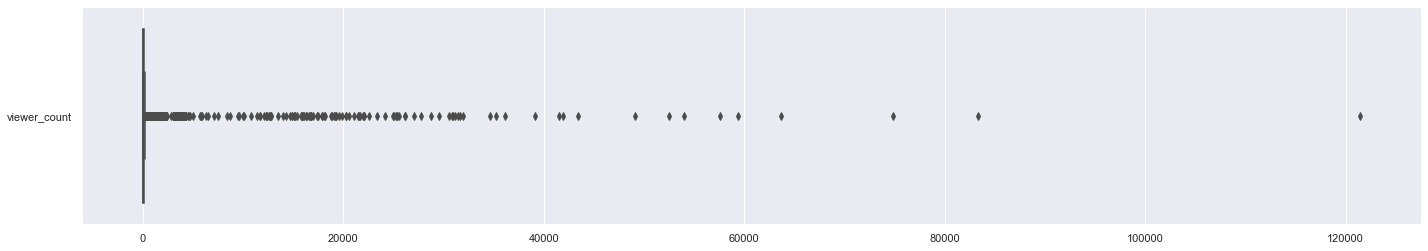

In [159]:
f = plt.figure(figsize=(24, 4))
sb.boxplot(data = en, orient = "h")

<AxesSubplot:>

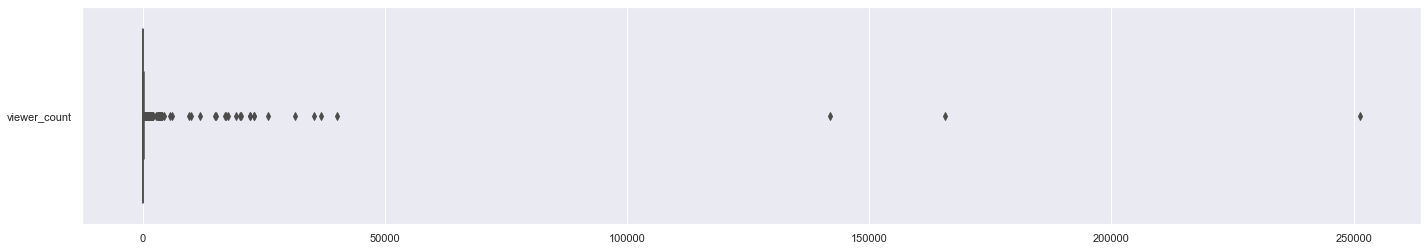

In [161]:
f = plt.figure(figsize=(24, 4))
sb.boxplot(data = es, orient = "h")